In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('c:/dataset/regression/salary_2_variable.csv')
df.Gender=df.Gender.map({'Male':0,'Female':1})
df

,Exp,Gender,Salary
0,1.1,0,41000
1,1.3,1,36205
2,1.5,1,37731
3,2.0,0,43525
4,2.2,1,39891
5,2.9,0,56642
6,3.0,0,60150
7,3.2,1,56240
8,3.3,0,59150
9,3.8,0,61000


In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(df.iloc[:,:-1].values,df.iloc[:,-1].values)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:
dtr.predict([[10,1]])

array([56240.])

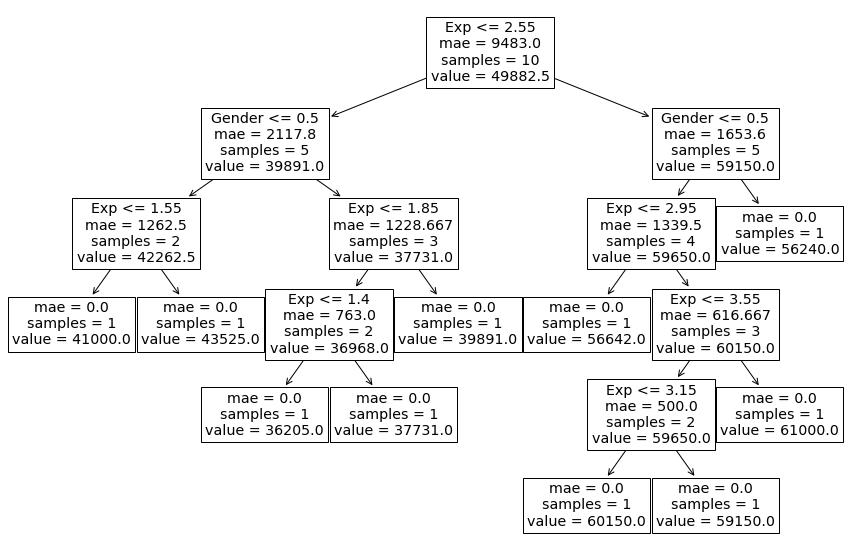

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(dtr,feature_names=df.columns[:-1])
plt.show()

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('c:/dataset/classification/fruits.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc.predict([[2.1,37]])

array(['Banana'], dtype=object)

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
bc=BaggingClassifier(base_estimator=LogisticRegression(solver='lbfgs'),n_estimators=10)

In [34]:
bc.fit(X,y)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None,

In [36]:
bc.predict([[2.1,37]])

array(['Banana'], dtype=object)

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [53]:
vc=VotingClassifier(estimators=[('knc',KNeighborsClassifier()),('svc',SVC()),('dt',DecisionTreeClassifier())])

In [54]:
vc.fit(X,y)

C:\Users\Aaditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('knc',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('svc',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto_deprecated',
                                  kernel='rbf', max_iter=-1, probability=False,
                                  random_st...
                                  verbose=False)),
                             ('dt',
                              DecisionTreeClassifier(class_

In [56]:
vc.predict([[2.1,39],[3.2,40]])

array(['Banana', 'Banana'], dtype=object)

In [59]:
vc=VotingClassifier(estimators=[('knc',KNeighborsClassifier()),('svc',SVC(probability=True)),('dt',DecisionTreeClassifier())],voting='soft')
vc.fit(X,y)
vc.predict([[2.1,39],[3.2,40]])

C:\Users\Aaditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['Banana', 'Banana'], dtype=object)

In [61]:
df=pd.read_csv('c:/dataset/regression/salary_2_variable.csv')
df.Gender=df.Gender.map({'Male':0,'Female':1})
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X,y)
rfr.predict([[10,0]])

C:\Users\Aaditya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([60630.])

In [68]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
br=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10)
br.fit(X,y)
br.predict([[3,0]])

array([56569.48638116])

In [69]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
vr=VotingRegressor(estimators=[('lr',LinearRegression()),('svr',SVR()),('rd',Ridge())])
vr.fit(X,y)
vr.predict([[3,0]])

C:\Users\Aaditya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([53974.95640214])